In [198]:
%matplotlib inline

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [200]:
def asympRead(cutoff):
    data = pd.read_csv("asymp-{0:d}.dat".format(cutoff))

    data = data.set_index(data.iloc[:,0])
    data.index.name = "E"
    data.drop(data.columns[0], axis=1, inplace=True)
    data.columns = [str(cutoff)]
    return data

In [250]:
data = pd.concat([asympRead(cutscale) for cutscale in (50, 75, 150)], axis=1)

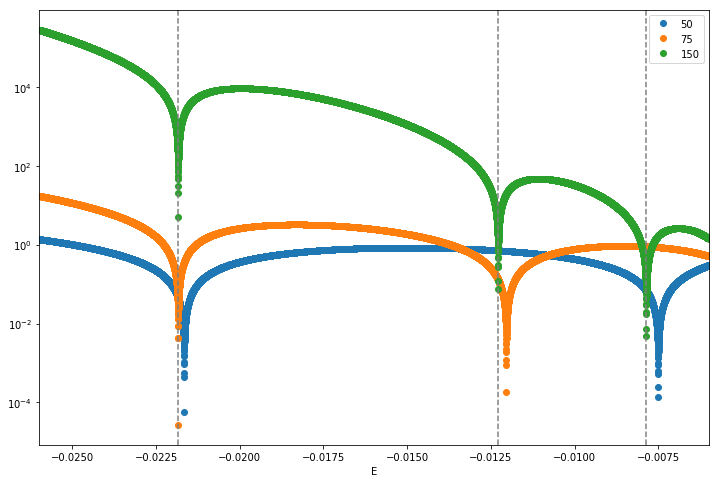

In [252]:
plotData = data.plot(marker="o", ls="", logy=True)

R = -0.196564
for i in range(1, 20):
    if R/i**2 < data.index[-1] and R/i**2 > data.index[0]:
        plotData.axvline(R/i**2, linestyle="--", color="gray")

Cut-off plays a key role in determining bound states. With higher energies one needs a more distant cutoff. Moreover,  not sufficient cutoff can mask some states (the state in the middle became "masked" by moving to the position of the third one).
Further we'll represent logarithmic derivative of the data above, it shows peaks on the flat background, so one can explore dislocations.

In [253]:
def plotRange(fromto=[-np.inf, np.inf]):
    colors = iter(["red", "green", "blue"])
    sizes = iter([1, 1, 1])
    plotData = np.log(data).diff().loc[(fromto[1] > data.index) & (data.index > fromto[0])]\
        .plot(marker="o", ls="", ms=4)
    ax = plt.gca()
    lines = ax.get_lines()
    for line in lines:
        color = line.get_markerfacecolor()
        #line.set_markerfacecolor("None")
        line.set_markeredgecolor(color)
        #line.set_markersize(int(float(line.get_label())**2/1800+4))
    R = -0.196564
    for i in range(1, 20):
        if R/i**2 < data.index[-1] and R/i**2 > data.index[0]:
            ax.axvline(R/i**2, linestyle="--", color="gray")

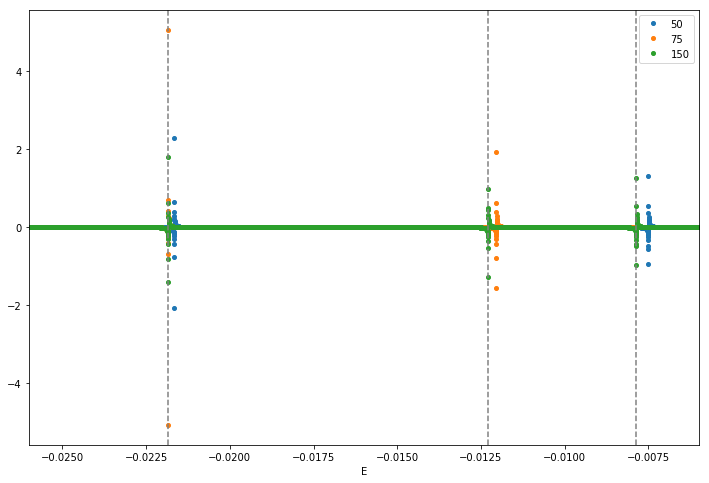

In [254]:
plotRange()

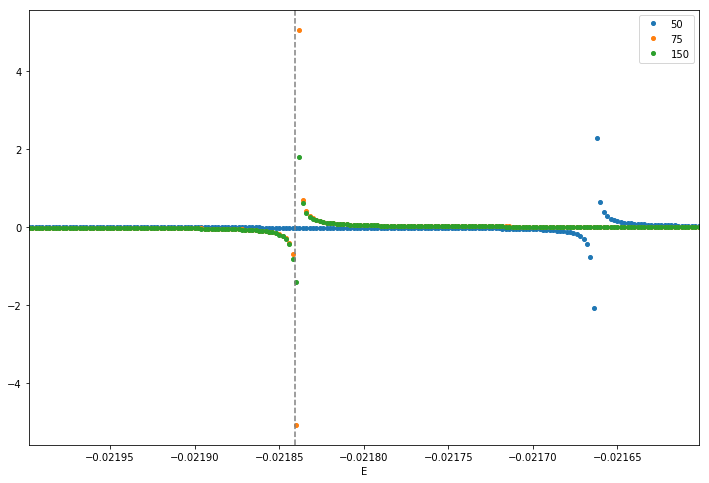

In [255]:
plotRange([-0.0220, -0.0216])

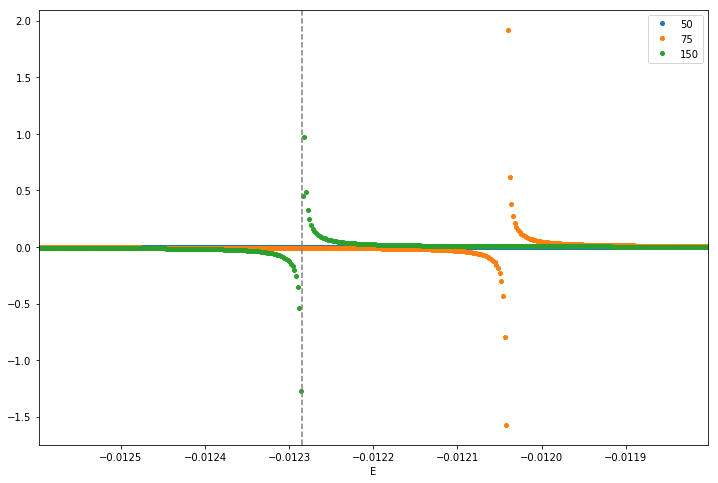

In [256]:
plotRange([-0.0126, -0.0118])

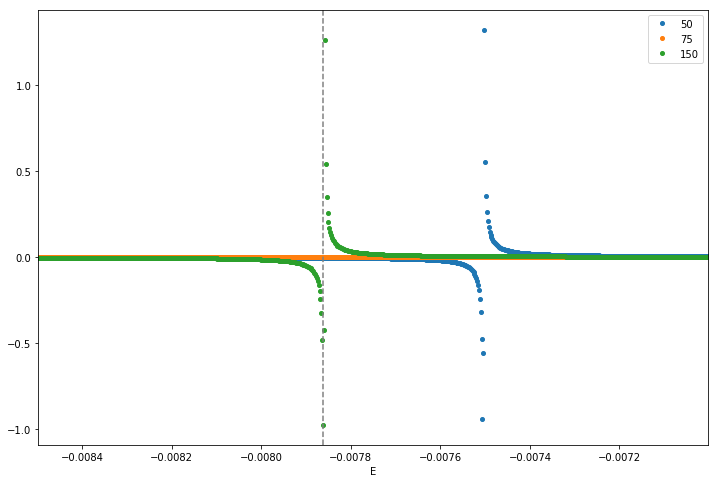

In [257]:
plotRange([-0.0085, -0.0070])